This notebook is used for exploring the initial datasets given by Zahra.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in the two datsets.

In [3]:
s_set = pd.read_csv("../../Data/Astronomy.csv")
l_set = pd.read_csv("../../Data/Astronomy20000_Original.csv")

Why does one have more columns than the other?

In [4]:
len(s_set.columns), len(l_set.columns)

(98, 124)

In [5]:
s_set.head()

,ID,o2sn,emsn1,emsn2,emsn3,emsn4,emsn5,emsn6,emsn7,emsn8,...,HIT_FWHM_data10,G_FAIL_data10,EMLINE_data11,HIT_PAR2_data11,HIT_PAR3_data11,HIT_PAR4_data11,HIT_CHI2_data11,HIT_FWHM_data11,G_FAIL_data11,Hits
0,10000_57346_116_multiline,9.84807,0.000000,0.000000,0.000000,0.00000,7.219380,0.000000,0.00000,0.00000,...,1.556333587,0,1,1.422592623,1.983385752,0.533199646,0.359276382,2.897465745,0,bad
1,10000_57346_124_multiline,0.00000,1.688110,5.440730,0.000000,0.00000,0.000000,0.000000,0.00000,4.05273,...,2.533741767,0,11,-0.51669912,1.799032709,0.270647345,3.62E-07,1.159157377,0,bad
2,10000_57346_125_oneline,15.73400,0.000000,0.714140,0.486063,0.00000,0.616556,0.896988,2.20671,1.42808,...,2.451458869,0,11,1.444404188,1.197257091,1.01770292,0.465643829,2.487853168,0,bad
3,10000_57346_146_oneline,6.04805,0.000000,0.733209,1.100220,1.52694,0.000000,0.000000,0.00000,0.00000,...,,1,11,0.526108827,0.889537468,0.758065565,0.020413101,2.902326746,0,bad
4,10000_57346_192_oneline,6.28542,0.359201,0.577766,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,2.640847634,0,4,0.19248576,0.539766549,1.309847542,0.087388471,3.227941177,0,bad


In [44]:
l_set.sort_values(by='id').head()

,id,index,wave,o2sn,emsn1,emsn2,emsn3,emsn4,emsn5,emsn6,...,G_FAIL_data10,EMLINE_data11,HIT_PAR1_data11,HIT_PAR2_data11,HIT_PAR3_data11,HIT_PAR4_data11,HIT_CHI2_data11,HIT_FWHM_data11,G_FAIL_data11,Hits
18440,10001_12701_fiber_559_oneline,3251,7655.9663,8.020063,0.000000,0.000000,0.0,0.048782,0.766544,NaN,...,1.0,11.0,7655.969854,-0.687763,2.853379,3.132628,0.109881,6.957911,0.0,bad
18441,10001_12702_fiber_188_oneline,3180,7531.8213,6.000601,0.000000,0.889500,0.0,0.000000,0.310842,NaN,...,1.0,11.0,7532.521705,0.035022,2.056552,1.702374,0.127388,4.291452,0.0,bad
18442,10001_12703_fiber_178_oneline,3647,8386.8720,19.043812,0.000000,0.000000,NaN,NaN,NaN,NaN,...,1.0,11.0,8386.219883,1.442163,10.492358,2.018959,0.178514,4.961383,0.0,bad
18443,10001_12703_fiber_458_oneline,1062,4624.8750,6.180350,0.000000,0.000000,0.0,0.634303,0.376014,0.000000,...,0.0,11.0,4624.389074,0.957325,1.899218,0.376856,0.198966,1.871991,0.0,bad
18444,10001_12703_fiber_711_oneline,1049,4611.0520,7.669427,0.299301,1.557217,0.0,0.000000,1.462397,1.200322,...,0.0,11.0,4609.402379,-1.445292,3.203896,9.239709,1.056343,NaN,0.0,bad


Different columns in the manga dataset than the eboss dataset.

In [45]:
set(l_set).difference(set(s_set))

{'HIA',
 'HIB',
 'HIC',
 'HID',
 'HIT_PAR1_data0',
 'HIT_PAR1_data1',
 'HIT_PAR1_data10',
 'HIT_PAR1_data11',
 'HIT_PAR1_data2',
 'HIT_PAR1_data3',
 'HIT_PAR1_data4',
 'HIT_PAR1_data5',
 'HIT_PAR1_data6',
 'HIT_PAR1_data7',
 'HIT_PAR1_data8',
 'HIT_PAR1_data9',
 'NIIA',
 'NIIB',
 'OIIA',
 'OIIB',
 'OIIIA',
 'OIIIB',
 'SIIA',
 'SIIB',
 'id',
 'index',
 'wave'}

In [46]:
set(s_set).difference(set(l_set))

{'ID'}

#### Class Balance

seems to be a bit unbalanced.

([<matplotlib.axis.XTick at 0x2d39c1bbb00>,
 <a list of 2 Text xticklabel objects>)

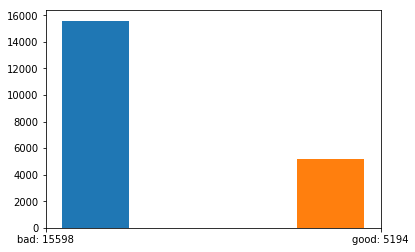

In [80]:
bad_cnt = l_set.Hits.value_counts().bad
good_cnt = l_set.Hits.value_counts().good
plt.hist([bad_cnt*[1], good_cnt*[2]], 2)
plt.xticks([1,2], ('bad: {}'.format(bad_cnt), 'good: {}'.format(good_cnt)))

### Astorpy for image viewing

In [38]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [39]:
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
fits.info(image_file)

Filename: C:\Users\stone\.astropy\cache\download\py3\2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [40]:
header, data = fits.getheader(image_file), fits.getdata(image_file, ext=0)

In [41]:
fits.getheader(image_file, ext=0)

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Beautiful

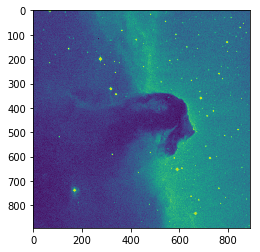

In [47]:
plt.imshow(fits.getdata(image_file, ext=0), cmap='viridis')